# Assignment:Advance Regression- House Price Prediction

The solution is divided into the following sections:

Data understanding and exploration

Data cleaning

Data preparation

Model building and evaluation

# 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [77]:
#importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [78]:
# reading the dataset
house_price_DS = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/9cefd607-bbb7-443d-bb3e-eac9fef04453/train.csv")

In [79]:
#Let's display the first few rows of the dataset 
house_price_DS.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
#number of observations
house_price_DS.shape

(1460, 81)

In [81]:
print(house_price_DS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [82]:
house_price_DS.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
#let's get statistical information about the numeric columns in the dataset
house_price_DS.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [84]:
#let's see statistical information about the non-numerical columns in our dataset:
house_price_DS.describe(include=[np.object]).transpose() 

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Data Cleaning

Dealing with Missing Values

In [85]:
# Getting the number of missing values in each column
house_price_DS.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [86]:
# Getting the percentages of missing values in each coloumn
(house_price_DS.isna().sum())* 100 / house_price_DS.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

Now we start dealing with these missing values.

Pool QC

The percentage of missing values in Pool QC column is 99.52% which is very high.
We think that a missing value in this column denotes that the corresponding house doesn't have a pool. 
To verify this, let's take a look at the values of Pool Area column:


In [87]:
house_price_DS["PoolArea"].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

We can see that there are 1453 entries in Pool Area column that have a value of 0. 
This verfies that each house without a pool has a missing value in Pool QC column and a value of 0 in Pool Area column.
So let's fill the missing values in Pool QC column with "No Pool"

In [88]:
house_price_DS["PoolQC"].fillna("No Pool", inplace=True)

MiscFeature:Miscellaneous feature not covered in other categories
Let's take a look at the values of Misc Val column:

In [89]:
house_price_DS["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

We can see that Misc Val column has 1408 entries with a value of 0. Misc Feature has 1406 missing values.
we can say that each house without a "miscellaneous feature" has a missing value in Misc Feature column 
and a value of 0 in Misc Val column.
So let's fill the missing values in Misc Feature column with "No Feature"

In [90]:
house_price_DS['MiscFeature'].fillna('No feature', inplace=True)

Alley,FireplaceQu,Fence having 93.76%,47.26%,80.75% missing values. 
we can say that NA values in this columns denotes that house doesn't have an alley, fence, or fireplace.
so we can replace missing values in this columns with 'No Alley','No fireplace','No Fence'.

In [91]:
house_price_DS['Alley'].fillna('No Alley', inplace=True)
house_price_DS['Fence'].fillna('No Fence', inplace=True)
house_price_DS['FireplaceQu'].fillna('No Fireplace', inplace=True)

Lot Frontage represents the linear feet of street connected to the house.
So we assume that the missing values in this column indicates that the house is not connected to any street,
and we fill in the missing values with 0:

In [92]:
house_price_DS['LotFrontage'].fillna(0, inplace=True)

According to the dataset documentation, NA in Garage Cond, Garage Qual, Garage Finish, and Garage Type indicates
that there is no garage in the house.
So we fill in the missing values in these columns with "No Garage".
For Garage Yr Blt, we will fill in missing values with 0 since this is a numerical column.

In [93]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_price_DS[col].fillna('No Garage', inplace=True)
    
house_price_DS['GarageYrBlt'].fillna(0, inplace=True)

Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond
NA in five of these columns indicates that there is no basement in the house.
So we fill in the missing values in these columns with "No Basement"

In [94]:
for col in ["BsmtExposure", "BsmtFinType2", 
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    house_price_DS[col].fillna("No Basement", inplace=True)

MasVnrArea and MasVnrType
We will fill in these missing values with "None" for Mas Vnr Type 
and with 0 for Mas Vnr Area.

In [95]:
house_price_DS['MasVnrArea'].fillna(0, inplace=True)
house_price_DS['MasVnrType'].fillna("None", inplace=True)

Electrical column has one missing value. We will fill in this value with the mode of this column:

In [96]:
house_price_DS['Electrical'].fillna(house_price_DS['Electrical'].mode()[0], inplace=True)

Now let's check if there is any remaining missing value in our dataset:

In [97]:
house_price_DS.isna().values.sum()

0

Deleting Some Unimportant Column that are not useful in our analysis:

# Exploratory Data Analysis

 Correlation Between Variables

Let's see how the dataset variables are correlated with each other and 
how predictor variables are correlated with the target variable.

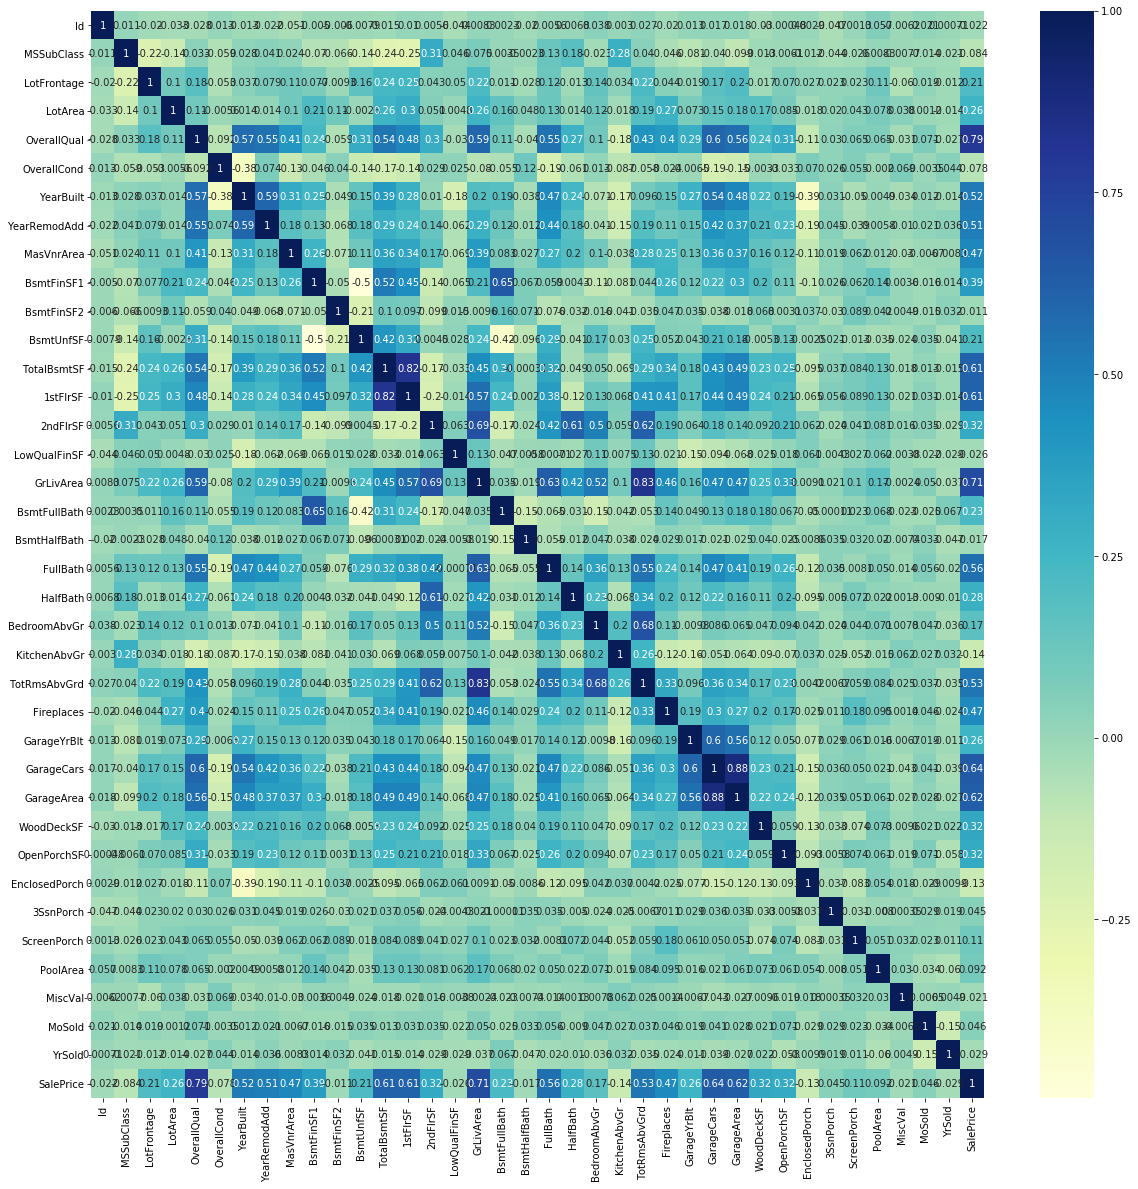

In [98]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_price_DS.corr(), ax=ax,annot = True, cmap="YlGnBu");



we can see that there id high correlation between SalePrice and GrLiveArea.
Let's plot SalePrice against Gr Liv Area

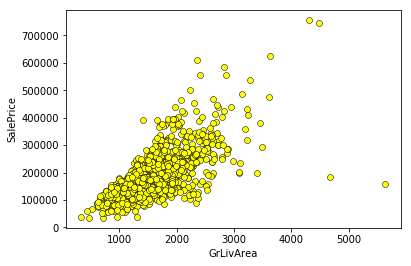

In [99]:
plt.scatter(x=house_price_DS['GrLivArea'], y=house_price_DS['SalePrice'], 
            color="yellow", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

# Outliers Removal
we can clearly see that there are some outliers in the dataset.
lets remove the outliers where GrLivArea is greater then 4000.

In [100]:
house_price_DS = house_price_DS[house_price_DS["GrLivArea"] < 4000]

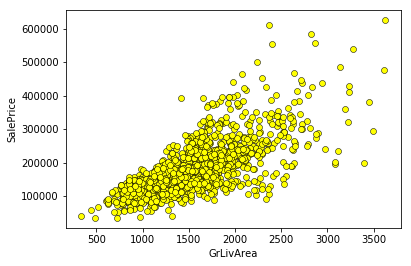

In [101]:
plt.scatter(x=house_price_DS['GrLivArea'], y=house_price_DS['SalePrice'], 
            color="yellow", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

Lets plot the distribution of our target veriable SalePrice

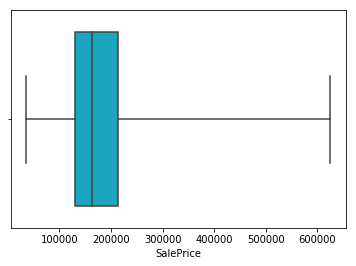

In [102]:
sns.boxplot(house_price_DS['SalePrice'], whis=10, color="#00B8D9");

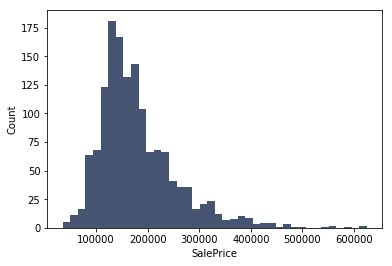

In [103]:
sns.distplot(house_price_DS['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see from the plot that most house prices fall between 100,000 and 250,000

Lets plot the distribution of 'GrLivArea'

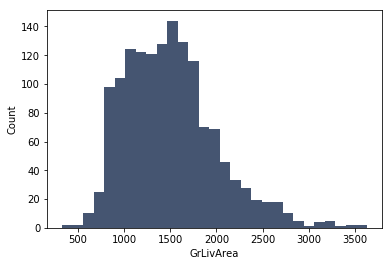

In [104]:
sns.distplot(house_price_DS['GrLivArea'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

from above Correlation We can see the there is higher correlation between Saleprice and OverallQual about 79% 
lets plot overallQual Vs Salesprice

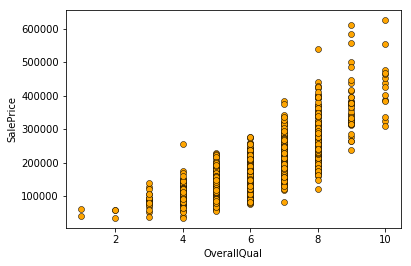

In [105]:
plt.scatter(x=house_price_DS['OverallQual'], y=house_price_DS['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("OverallQual"); plt.ylabel("SalePrice");

we can see that as the overall quality increases, the sale price increases.

# Creating New Derived Features

we can see in dataset we have given YearBuilt coloumn.
from that we can get the age of house and effect of age of house on sales price 


In [106]:
import datetime
house_price_DS['CurrentYear'] = datetime.datetime.now().year
house_price_DS["HouseAge"] = house_price_DS['CurrentYear'] - house_price_DS['YearBuilt'] 

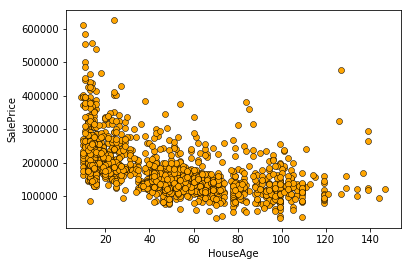

In [107]:
plt.scatter(x=house_price_DS['HouseAge'], y=house_price_DS['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("HouseAge"); plt.ylabel("SalePrice");

we can see thet sales price is slowly decersing as age of house increases.

BsmtCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, CentralAir,
KitchenQual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence. 
We will map the values of each of them to corresponding numbers "No Basement" to 0, "Po" to 1, "Fa" to 2, "TA" to 3, "Gd" to 4, and "Ex" to 5.

In [108]:

mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
house_price_DS['ExterQual'] = house_price_DS['ExterQual'].map(mp)
house_price_DS['ExterCond'] = house_price_DS['ExterCond'].map(mp)
house_price_DS['HeatingQC'] = house_price_DS['HeatingQC'].map(mp)
house_price_DS['KitchenQual'] = house_price_DS['KitchenQual'].map(mp)



mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
house_price_DS['BsmtQual'] = house_price_DS['BsmtQual'].map(mp)
house_price_DS['BsmtCond'] = house_price_DS['BsmtCond'].map(mp)
house_price_DS['BsmtExposure'] = house_price_DS['BsmtExposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
house_price_DS['BsmtFinType1'] = house_price_DS['BsmtFinType1'].map(mp)
house_price_DS['BsmtFinType2'] = house_price_DS['BsmtFinType2'].map(mp)

house_price_DS['CentralAir'] = house_price_DS['CentralAir'].map({'Y':1,'N':0})
house_price_DS['Functional'] = house_price_DS['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})



house_price_DS['FireplaceQu'] = house_price_DS['FireplaceQu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

house_price_DS['GarageFinish'] = house_price_DS['GarageFinish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
house_price_DS['GarageQual'] = house_price_DS['GarageQual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
house_price_DS['GarageCond'] =house_price_DS['GarageCond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
house_price_DS['PoolQC'] = house_price_DS['PoolQC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
house_price_DS['LandSlope'] = house_price_DS['LandSlope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})

house_price_DS['Fence'] = house_price_DS['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

 creating dummy variables for categorical variables

In [109]:
house_price_DS.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
# split into X and y
X = house_price_DS.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'CurrentYear', 'HouseAge']]

y = list(house_price_DS['SalePrice'])
#y = list(y)

In [111]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_price_DS_categorical = X.select_dtypes(include=['object'])
house_price_DS_categorical.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,No feature,WD,Normal
1,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Y,No feature,WD,Normal
2,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,No feature,WD,Normal
3,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Y,No feature,WD,Abnorml
4,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,No feature,WD,Normal


In [112]:
# convert into dummies
house_price_DS_dummies = pd.get_dummies(house_price_DS_categorical, drop_first=True)
house_price_DS_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [113]:
# drop categorical variables 
X = X.drop(list(house_price_DS_categorical.columns), axis=1)

In [114]:
# concat dummy variables with X
X = pd.concat([X, house_price_DS_dummies], axis=1)

In [115]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=206)

In [116]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Evaluation

# RFE
Recursive feature elimination

In [117]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [118]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 43),
 ('LotFrontage', False, 109),
 ('LotArea', True, 1),
 ('LandSlope', False, 177),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 7),
 ('YearRemodAdd', False, 145),
 ('MasVnrArea', False, 19),
 ('ExterQual', True, 1),
 ('ExterCond', False, 50),
 ('BsmtQual', False, 17),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 85),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 178),
 ('BsmtFinSF2', False, 25),
 ('BsmtUnfSF', False, 13),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 136),
 ('CentralAir', False, 75),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 28),
 ('GrLivArea', False, 14),
 ('BsmtFullBath', False, 84),
 ('BsmtHalfBath', False, 127),
 ('FullBath', False, 30),
 ('HalfBath', False, 149),
 ('BedroomAbvGr', False, 5),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 9),
 ('TotRmsAbvGrd', False, 10),
 ('Functional', False, 15),
 ('Fireplaces', False, 48),
 ('Fire

In [120]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'KitchenAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_No Garage', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [121]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LandSlope', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=186)

Building model using statsmodel, for the detailed statistics

In [122]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Custom Function Definations For model fitting

In [123]:
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [125]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [126]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     409.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:40:38   Log-Likelihood:                -11778.
No. Observations:                1019   AIC:                         2.360e+04
Df Residuals:                     998   BIC:                         2.370e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.799e+

SaleType_New has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [127]:
X_train1 = X_train_rfe.drop('GarageType_Detchd', axis=1)

In [128]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     430.6
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:40:39   Log-Likelihood:                -11778.
No. Observations:                1019   AIC:                         2.360e+04
Df Residuals:                     999   BIC:                         2.369e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.799e+

In [129]:
getVIF(X_train1)

,Features,VIF
17,SaleType_New,86.15
18,SaleCondition_Partial,85.50
7,TotalBsmtSF,5.78
8,1stFlrSF,4.64
1,OverallQual,3.32
11,GarageCars,3.00
3,ExterQual,2.63
12,HouseAge,2.42
9,2ndFlrSF,2.04
4,BsmtCond,1.88


In [130]:
X_train2 = X_train1.drop('SaleType_New', axis=1)

In [131]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     448.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:40:40   Log-Likelihood:                -11785.
No. Observations:                1019   AIC:                         2.361e+04
Df Residuals:                    1000   BIC:                         2.370e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    1.8e+

In [132]:
getVIF(X_train2)

,Features,VIF
7,TotalBsmtSF,5.78
8,1stFlrSF,4.64
1,OverallQual,3.32
11,GarageCars,2.98
3,ExterQual,2.62
12,HouseAge,2.41
9,2ndFlrSF,2.04
4,BsmtCond,1.88
16,GarageType_No Garage,1.75
6,BsmtFinSF1,1.44


In [133]:
X_train3 = X_train2.drop('TotalBsmtSF', axis=1)

In [134]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     455.7
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:40:41   Log-Likelihood:                -11804.
No. Observations:                1019   AIC:                         2.364e+04
Df Residuals:                    1001   BIC:                         2.373e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    1.8e+

In [135]:
getVIF(X_train3)

,Features,VIF
1,OverallQual,3.29
10,GarageCars,2.98
3,ExterQual,2.59
11,HouseAge,2.41
7,1stFlrSF,2.34
8,2ndFlrSF,2.01
15,GarageType_No Garage,1.75
6,BsmtFinSF1,1.40
5,BsmtExposure,1.37
13,Neighborhood_NridgHt,1.34


# Ridge Regression

In [136]:
# list of alphas to tune
params = {'alpha': [ 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400,500,1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train3, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [137]:
print("Best parameters:")
print(model_cv.best_params_)

Best parameters:
{'alpha': 50}


In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.197896,3.898100e-01,0.000199,0.000399,1,{'alpha': 1.0},-22019.433088,-17708.419151,-19584.813388,-17878.668611,...,-18974.256554,1682.016124,13,-17378.535282,-18720.017749,-18248.629023,-18914.835701,-18760.767907,-18404.557132,559.253100
1,0.002393,4.880334e-04,0.000399,0.000489,2,{'alpha': 2.0},-22016.792258,-17710.843154,-19576.673891,-17865.076515,...,-18968.695477,1682.785528,12,-17375.319675,-18714.527343,-18241.769891,-18910.359459,-18755.171022,-18399.429478,558.667270
2,0.001995,5.135693e-07,0.000598,0.000489,3,{'alpha': 3.0},-22014.141901,-17713.716734,-19568.579762,-17851.559653,...,-18963.255720,1683.487682,11,-17372.174873,-18709.123292,-18235.171358,-18906.119557,-18749.747126,-18394.467241,558.117762
3,0.001795,3.987395e-04,0.000399,0.000489,4,{'alpha': 4.0},-22011.482269,-17716.638069,-19560.530432,-17838.181996,...,-18957.869401,1684.174685,10,-17369.038481,-18703.895937,-18228.600092,-18901.887993,-18744.348351,-18389.554171,557.590189
4,0.001395,4.870788e-04,0.000200,0.000399,5,{'alpha': 5.0},-22009.058083,-17719.487075,-19552.525344,-17826.175513,...,-18952.807821,1684.787808,9,-17366.104436,-18698.955530,-18222.113417,-18897.664702,-18739.022037,-18384.772024,557.028675
5,0.001596,4.885193e-04,0.000200,0.000399,6,{'alpha': 6.0},-22006.831198,-17722.365505,-19544.563955,-17814.439321,...,-18947.863039,1685.443279,8,-17363.645655,-18694.232558,-18215.930122,-18893.449616,-18733.841699,-18380.219930,556.322100
6,0.001793,3.985221e-04,0.000200,0.000399,7,{'alpha': 7.0},-22005.100498,-17725.377636,-19536.645730,-17802.760343,...,-18943.072838,1686.263120,7,-17361.189829,-18689.697045,-18210.374872,-18889.290150,-18728.919003,-18375.894180,555.643005
7,0.002992,2.523570e-03,0.000399,0.000489,8,{'alpha': 8.0},-22004.149899,-17728.319051,-19528.770147,-17791.137876,...,-18938.452724,1687.380600,6,-17358.736974,-18685.190478,-18205.119721,-18885.188995,-18724.047659,-18371.656765,554.966517
8,0.001795,3.984703e-04,0.000199,0.000398,9,{'alpha': 9.0},-22003.351525,-17731.191149,-19520.936695,-17779.975004,...,-18933.957716,1688.511984,5,-17356.342691,-18680.805308,-18200.323779,-18881.095064,-18719.252309,-18367.563831,554.266500
9,0.001597,4.888894e-04,0.000399,0.000489,10,{'alpha': 10.0},-22002.536901,-17733.995294,-19513.144873,-17769.118072,...,-18929.523343,1689.615782,4,-17354.386820,-18676.490164,-18195.742651,-18877.040504,-18714.531541,-18363.638336,553.418770


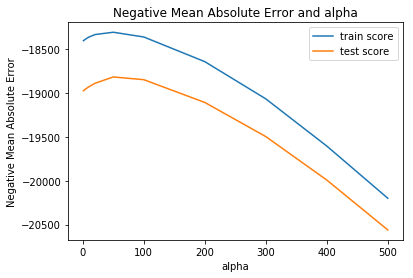

In [139]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [140]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train3, y_train)
ridge.coef_

array([ 6614.4173181 , 17184.50650288,  5316.30936928, 10793.31717948,
       -1139.0446783 ,  5120.88223738, 10989.59431291, 25340.69004873,
       20293.78615614, -5457.64255631,  8734.51985024, -5057.70390098,
        5495.92575136,  6424.2008568 ,  3383.24727193,  3220.43784007,
        6430.88837983])

# Lasso

In [141]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train3, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [142]:
print("Best parameters:")
print(model_cv.best_params_)

Best parameters:
{'alpha': 500}


In [143]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088768,1.725504e-01,0.000396,0.000485,1,{'alpha': 1.0},-22021.823764,-17705.741712,-19593.094653,-17891.670042,...,-18979.649127,1681.280987,18,-17381.887219,-18725.220503,-18255.140609,-18919.425204,-18766.121406,-18409.558988,559.767239
1,0.002393,4.880723e-04,0.000399,0.000489,2,{'alpha': 2.0},-22021.591455,-17705.553634,-19593.185411,-17891.007640,...,-18979.362790,1681.385667,17,-17381.790438,-18724.911033,-18254.748933,-18919.119126,-18765.851522,-18409.284210,559.699345
2,0.003391,4.881886e-04,0.000598,0.000488,3,{'alpha': 3.0},-22021.366940,-17705.357200,-19593.255608,-17890.345168,...,-18979.072714,1681.492586,16,-17381.695151,-18724.597060,-18254.350475,-18918.811275,-18765.588989,-18409.008590,559.631392
3,0.003391,4.885001e-04,0.000399,0.000489,4,{'alpha': 4.0},-22021.148765,-17705.173553,-19593.305117,-17889.683236,...,-18978.808732,1681.577970,15,-17381.597945,-18724.295996,-18254.058333,-18918.501793,-18765.434734,-18408.777760,559.573233
4,0.003191,3.986121e-04,0.000599,0.000489,5,{'alpha': 5.0},-22020.940937,-17704.918209,-19593.403184,-17889.022820,...,-18978.516137,1681.701738,14,-17381.499559,-18724.112939,-18253.679860,-18918.191294,-18765.177551,-18408.532241,559.520294
5,0.004388,1.352642e-03,0.000399,0.000489,6,{'alpha': 6.0},-22021.113163,-17704.734577,-19593.501250,-17888.365343,...,-18978.314572,1681.951927,13,-17381.460082,-18723.811788,-18253.310392,-18917.881099,-18764.920369,-18408.276746,559.431974
6,0.003192,3.989462e-04,0.000598,0.000488,7,{'alpha': 7.0},-22020.888228,-17704.550945,-19593.599316,-17887.837958,...,-18978.059541,1682.041420,12,-17381.372164,-18723.510637,-18252.940924,-18917.665938,-18764.663187,-18408.030570,559.378760
7,0.003192,3.984690e-04,0.000399,0.000489,8,{'alpha': 8.0},-22020.663293,-17704.367313,-19593.697383,-17887.178447,...,-18977.787018,1682.141155,11,-17381.284247,-18723.209487,-18252.571456,-18917.365112,-18764.487874,-18407.783635,559.320387
8,0.003391,4.886561e-04,0.000199,0.000399,9,{'alpha': 9.0},-22020.438358,-17704.183681,-19593.892486,-17886.584640,...,-18977.538112,1682.246442,10,-17381.196330,-18722.908336,-18252.287179,-18917.152825,-18764.230648,-18407.555064,559.262980
9,0.002793,3.987074e-04,0.000199,0.000399,10,{'alpha': 10.0},-22020.213424,-17704.035844,-19593.990486,-17885.925089,...,-18977.271510,1682.341764,9,-17381.108413,-18722.703567,-18251.917666,-18916.851929,-18763.973422,-18407.310999,559.205034


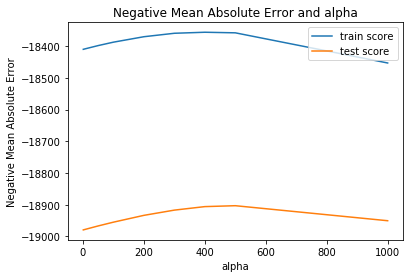

In [144]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [145]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train3, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
lasso.coef_

array([ 6068.59360107, 17213.00005414,  4701.39032057, 10745.13312398,
        -503.94071774,  4937.47037189, 10945.16621916, 27240.31971294,
       21796.066237  , -5378.91911264,  7494.97573898, -4726.94629102,
        4768.55668149,  6190.42337103,  2805.83765138,  2378.49705923,
        6292.75144892])

We can see that the value of alpha for ridge regression is 50 and for lasso regression is 500.
The veriables which are usefull in prediction of house prices are OverallQual,
GarageCars,
ExterQual,
HouseAge
1stFlrSF,4
2ndFlrSF,
GarageType_No Garage,
BsmtFinSF1,
BsmtExposure,
Neighborhood_NridgHt,
GarageType_BuiltIn,
SaleCondition_Partial,
OverallCond,
BsmtCond,
KitchenAbvGr,
Neighborhood_NoRidge,
LotArea



we have choosen the best model lasso with value of alpha =500